# Towards Graph Machine Learning
Francesco Cauteruccio$^1$ and Aldo Marzullo$^2$

$^1$ Polytechnic University of Marche, Italy ([f.cauteruccio@univpm.it](mailto://f.cauteruccio@univpm.it))

$^2$ University of Calabria, Italy ([marzullo@mat.unical.it](mailto://marzullo@mat.unical.it))

## Scope of this notebook

This is an interactive notebook consisting in an introduction to the Python package [NetworkX](https://networkx.org/). This notebook will serve as a guided tour of the features and capabilities provided by NetworkX and how we can use them. The notebook exploits a Python interpreter, therefore the student is suggested to have a a minimal knowledge of this programming language.

This notebook runs in Google Colab. You need to have a Google account in order to modify, run and save it. The optimal way to use it is to save a copy on your Google Drive. Then, you're free to explore  and play with it! To follow the tour, just open the Table of Contents (the taskbar on the left of the Google Colab interface) and follow the sections.

This notebook will have text cells containing some exercises. There are also few suggestions on how to succesfully complete them. You should refer to the NetworkX reference at the following link: https://networkx.org/documentation/stable/reference/index.html

## Import and use the package

We can import module in Python via the `import` keyword. The whole NetworkX package is available via a module named `networkx`. The module should be already be installed. If you get an error when importing it via `import networkx`, then execute the cell containing `!pip install networkx`: this command creates a new shell in which the command `pip install networkx` will be executed. Then you can import the module.

As a suggestion, give the module an alias via the keyword `as`. The community often uses `import networkx as nx`, thus we can access the module via the name `nx` (we are sooo lazy!)

In [1]:
import networkx as nx

## How to define a graph manually

A simple graph is defined by the class `Graph`. Calling the constructor will initialize a new simple graph.

Questions:
- [ ] What are other kinds of graphs that can be constructed? ...
- [ ] ... and build a graph for each of them.

In [4]:
g = nx.Graph()
dg = nx.DiGraph()
mg = nx.MultiGraph()
mdg = nx.MultiDiGraph()

### Add nodes and edges

A node can be added to a graph `g` via `g.add_node(node)`, while an edge can be added via `g.add_edge(node1, node2)`. Removing all nodes and edges is achieved by `g.clear()`.

Questions:
- [ ] Adding one node/edge at time is exhausting. Is there a way to add a collection of nodes/edge in a single pass?
- [ ] How can we check the actual number of nodes/edges?
- [ ] How can we remove a particular node or edge?
- [ ] Can we use graph constructors to build graphs starting from a list of nodes or edges?

In [5]:
g.add_node(0)
g.add_node(1)
g.add_node(2)

g.add_edge(0,1)
g.add_edge(2,0)
g.add_edge(1,2)

### Examing elements of a graph

`g.nodes` and `g.edges` are set-like views of the nodes and edges. They offer a continually updated read-only view into the graph structure. We can iterate on them or define a `list` from them.

Questions:

- [ ] Are there set-like views also for neighbors and degree of a node?

In [6]:
g.nodes

NodeView((0, 1, 2))

In [7]:
g.edges

EdgeView([(0, 1), (0, 2), (1, 2)])

### Accessing edges and neighbors

Subscript notations is also used to access edges and neighbors. As an example, `g[1][2]` provides an access to edge(s) between nodes 1 and 2.

Questions:

- [ ] We can fast access all (node, adjacency) pairs via `g.adjacency()` or `g.adj.items()`. Try it!
- [ ] Check if for undirected graph these iterations return the same edge twice.

In [14]:
for i in g.nodes:
  print(f"neigh({i}):")
  for j in g[i]:
    print(j)

neigh(0):
1
2
neigh(1):
0
2
neigh(2):
0
1


### Adding attributes

We can add attributes to graphs, nodes and edges. For graphs, attributes are added in the constructor via optional parameters. For nodes and edges, attributes can be added via optional parameters when the node/edge is inserted, or after their insertion via the subscript.

Questions:

- [ ] Can we add nodes/edges attributes when using the `add_nodes_from/add_edges_from` methods?

In [15]:
g[0][1]['weight'] = 42

In [17]:
g[0][1]

{'weight': 42}

### Visualizing graphs

NetworkX offers basic drawing with Matplotlib as well as an interface to use open source Graphviz software package. The visualization offered by NetworkX are useful enough if we work with small graphs. To use them, we first need to import `matplotlib.pyplot`. Then, we can select some `draw_` method from the NetworkX package to draw the graph.

Questions:
- [ ] How do we create a graph and draw it using the shell layout?
- [ ] Try to experiment with other layouts.
- [ ] Is it possible to draw also labels or specific attributes on nodes/edges?

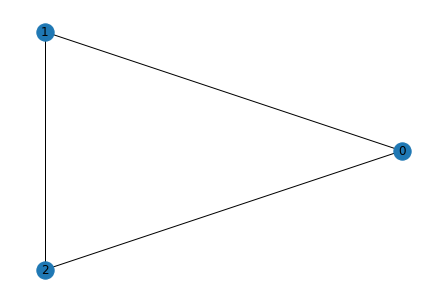

In [19]:
nx.draw_circular(g, with_labels=True)

## How to load graph data

There are different standard file formats for graph-structured data, such as GEXF, GML, GraphML and so on. [NetworkX provides different functions for reading and writing files in these formats](https://networkx.org/documentation/stable/reference/readwrite/index.html).

Often, graph-structured data is simply given via a textual file containing the list of edges. This is called an "adjacency file list" and can be easily read via NetworkX. Indeed, we can process such file also directly by opening it via Python and build the graph accordingly.

Let us download the ego-Facebook dataset from SNAP. Here's the edge list file: http://snap.stanford.edu/data/facebook_combined.txt.gz

If you're using this notebook in a local environment, you can just download the file and move it into the same directory of the notebook. Otherwise, you can download it from the web directly from the notebook via a shell command, then extract it and read it via NetworkX.

In [ ]:
# wget will download the file and place it in the directory of the notebook
!wget http://snap.stanford.edu/data/facebook_combined.txt.gz 

In [ ]:
# the file will be extracted as facebook_combined.txt
!gzip -d facebook_combined.txt.gz

## Analyzing graphs

We can now continue on the ego-Facebook graph and try to analyze it.

### Basic properties

- [ ] Min, max, avg degree
- [ ] Density of the graph

### Distances

- [ ] Given two random nodes in our graph, how many shortest paths there are between them? What is their length?
- [ ] Compute eccentricity, radius, diameter (be careful!)
- [ ] Compute the characteristic path length.
- [ ] Given two random nodes in our graph, compute the efficiency between them.
- [ ] Compute the (average) local and global efficiency of the graph.

### Segregation metrics

- [ ] Compute the average clustering coefficient of the graph.
- [ ] Compute the global transitivity.

### Centralities

- [ ] Compute the degree, betweenness and closeness centralities.
- [ ] Try to create a plot showing the distribution of the degrees.

### Components and structures

- [ ] Given two random nodes, find the maximal clique that contain them.
- [ ] Compute the main core (the maximum $k$-core) of the graph.
- [ ] Given a node, extract its *ego-network* (the ego-network of a node $u$ in a graph $G$ is the subgraph consisting of the node $u$, which is called "ego", and the nodes to whom ego is directly connected to (these are called "alters") plus the links, if any, among the alters)